In [159]:
import tensorflow as tf

**Q1. Develop a committee of deep learning models on the Fashion MNIST dataset and compare 
their combined performance against individual models, using various metrics including confusion 
matrices and classification reports (70 points).**

**Setting Random State for Reproducibility**

In [ ]:
import random
import numpy as np

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [161]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the fashion_mnist dataset provide four numpy arrays i.e train_images and train_labels for training set and 
test_images, and test_labels as testing set. The images are 28x28 NumPy arrays contains pixel ranging from 0 to 255. 
The labels from 0 to 9.

In [162]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Data Exploration & Preparation**

**Exploration: Visualize a sample of images from each class in the Fashion MNIST dataset.**

In [163]:
import matplotlib.pyplot as plt

In [164]:
# first collect all the unique class label from the dataset

unique_label = {}

for i, label in enumerate(train_labels):
    if label not in unique_label:
        unique_label[label] = train_images[i]
        if len(unique_label)==len(class_names):
            break

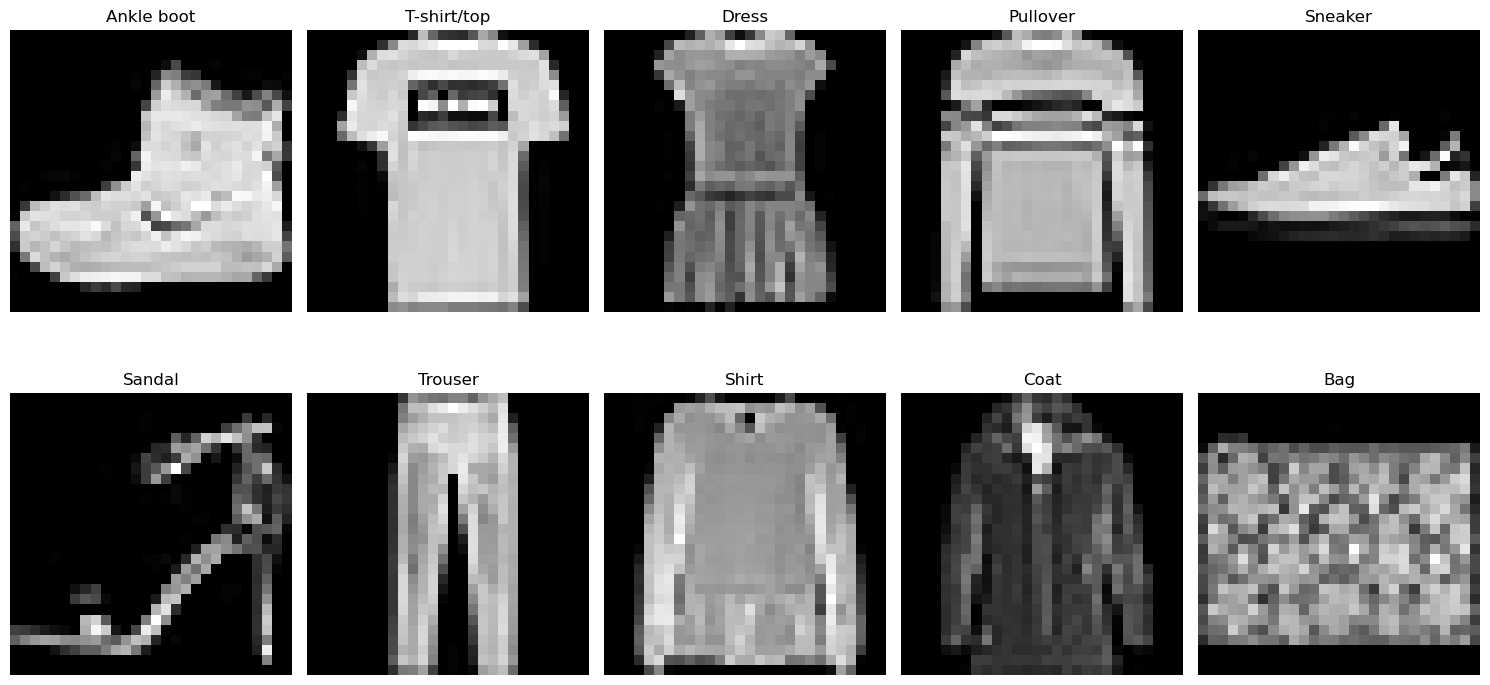

In [165]:
# Plot the unique classes
plt.figure(figsize=(15, 8))
for i, (label, image) in enumerate(unique_label.items()):
    plt.subplot(2, 5, i + 1)  
    plt.imshow(image, cmap="gray")  
    plt.xticks([])
    plt.yticks([])
    plt.title(class_names[label])
    plt.axis("off")  # Turn off the axes

plt.tight_layout()
plt.show()

**Normalization: Scale the images to have pixel values between [0,1]**

In [166]:
# Normalize the pixel values of the images to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [167]:
train_images[0].max()

1.0

**Data Formatting: Convert labels to one-hot encoded vectors. Prepare data suitable for CNNs.**

In [168]:
from sklearn.preprocessing import OneHotEncoder

ecoder = OneHotEncoder(sparse_output=False)
train_labels_ohe = ecoder.fit_transform(train_labels.reshape(-1,1))
test_labels_ohe = ecoder.transform(test_labels.reshape(-1,1))

### **Model 1: Design a shallow neural network. Explain the choice of layers and activations.**

Creatig a shallow network consists of flattaning the input into 1D and using N number of dense layer consists of 
n number of nodes. The output neurons is the number of output classes. Here, **1 layers** of dense layer is choosen with **128 nodes** and having **relu** as a activation function in the middle layers and **softmax** as an activation function for output layer having 10 neurons one for each label.

**Model with SGD Optimizer**

In [169]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

In [170]:
# Build the model
shallowModel_sgd = Sequential([
    Flatten(input_shape=(28, 28)),  # Transforms the format of the images from a 2D array to a 1D array
    Dense(128, activation='relu'), # First Dense layer with 128 nodes (neurons)
    Dense(10, activation='softmax')  # Output Dense layer with 10 nodes for 10 class labels
])

# Model Summary
shallowModel_sgd.summary()

# Compile the model

# Optimizer: 'sgd' is generally simpler and uses a initial learning rate(0.1)
# used 'momentum' as 0.9 to accelerate SGD in the relevent direction.
# 'nesterov' (also called Nesterov Accelerated Gradient (NAG)) is an advancement in the SDG

initial_learning_rate = 0.01
optimizer = SGD(
    learning_rate=initial_learning_rate,
    momentum=0.9,
    nesterov=True
)

# used CategoricalCrossentropy for loss calculation
shallowModel_sgd.compile(optimizer,
              loss= tf.keras.losses.CategoricalCrossentropy,              
              metrics=['accuracy'])

# Train the model
shallowModelHistory_sgd = shallowModel_sgd.fit(
                train_images, 
                train_labels_ohe,        
                batch_size=32, 
                epochs=100,
                validation_split=0.2
            )

c:\Users\aarun\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_30 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7612 - loss: 0.6833 - val_accuracy: 0.8443 - val_loss: 0.4432
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8535 - loss: 0.4118 - val_accuracy: 0.8608 - val_loss: 0.3954
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8691 - loss: 0.3682 - val_accuracy: 0.8692 - val_loss: 0.3715
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8781 - loss: 0.3421 - val_accuracy: 0.8689 - val_loss: 0.3659
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8855 - loss: 0.3227 - val_accuracy: 0.8735 - val_loss: 0.3514
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8884 - loss: 0.3074 - val_accuracy: 0.8754 - val_loss: 0.3488
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8947 - loss: 0.2943 - val_accuracy: 0.8792 - val_loss: 0.3401
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8974 - loss: 0

**Saving the history of shallow neural network**

In [171]:
import pandas as pd

shallowModelInfo = pd.DataFrame(shallowModelHistory_sgd.history)
shallowModelInfo

,accuracy,loss,val_accuracy,val_loss
0,0.813375,0.532613,0.844250,0.443247
1,0.855521,0.402651,0.860833,0.395417
2,0.869521,0.364064,0.869250,0.371462
3,0.877604,0.340125,0.868917,0.365875
4,0.884208,0.321083,0.873500,0.351350
...,...,...,...,...
95,0.983646,0.048602,0.873000,0.740868
96,0.982792,0.049776,0.874167,0.734210
97,0.983521,0.048451,0.874500,0.748328
98,0.982167,0.050946,0.871750,0.769826


**Evaluate the Model**

In [227]:
# Evaluate the model
test_loss, test_acc = shallowModel_sgd.evaluate(test_images, test_labels_ohe, verbose=3)
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss)

# Make predictions on the test dataset
predictions_shallowModel_sgd = shallowModel_sgd.predict(test_images)
predicted_shallowModel_sgd = np.argmax(predictions_shallowModel_sgd, axis=1)


Test accuracy: 0.8712000250816345 
Test loss: 0.7615089416503906
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step


**Visualize the Accuracy and Loss**

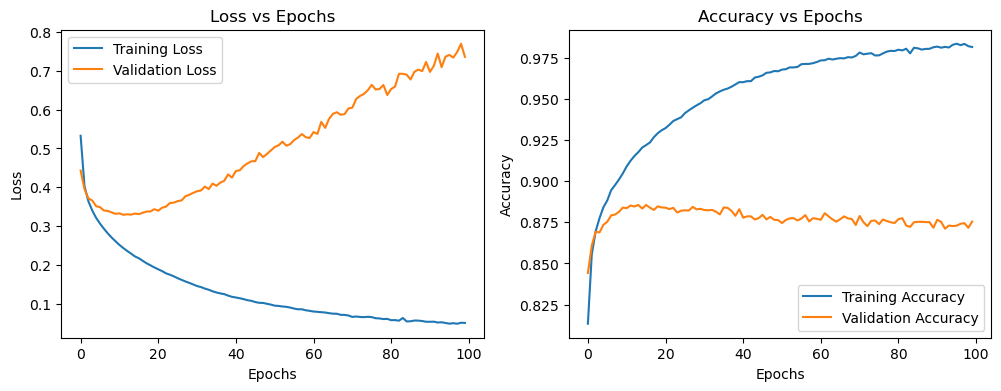

In [173]:
import matplotlib.pyplot as plt

# Assuming `history` is the object returned by model.fit()
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(shallowModelHistory_sgd.history['loss'], label='Training Loss')
plt.plot(shallowModelHistory_sgd.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(shallowModelHistory_sgd.history['accuracy'], label='Training Accuracy')
plt.plot(shallowModelHistory_sgd.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


**Visualize the Report**

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1000
           1       0.98      0.98      0.98      1000
           2       0.81      0.78      0.79      1000
           3       0.86      0.89      0.87      1000
           4       0.81      0.79      0.80      1000
           5       0.97      0.93      0.95      1000
           6       0.67      0.69      0.68      1000
           7       0.93      0.93      0.93      1000
           8       0.97      0.95      0.96      1000
           9       0.92      0.96      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



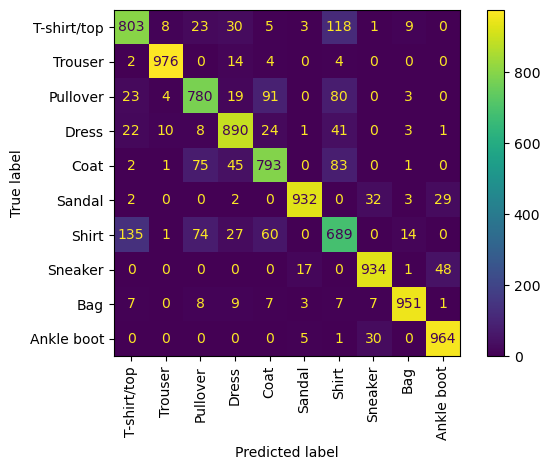

In [228]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

confusionMatrix = confusion_matrix(y_true=test_labels, y_pred=predicted_shallowModel_sgd)

classificationReport = classification_report(y_true=test_labels, y_pred=predicted_shallowModel_sgd)
print(f"Classification Report : \n {classificationReport}")

disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation=90)
plt.tight_layout()
plt.show()


**Model with Adam Optimizer**

In [175]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.layers import Input, Flatten, Dense

# Build the model
shallowModel_adam = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),  # Transforms the format of the images from a 2D array to a 1D array
    Dense(128, activation='relu'), # First Dense layer with 128 nodes (neurons)
    Dense(10, activation='softmax')  # Output Dense layer with 10 nodes for 10 class labels
])

# Model Summary
shallowModel_adam.summary()

# Create learning_rate_schedule
learning_rate_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=100,
    decay_rate=0.9,
    staircase=True
)

# Create Optimizer
optimizer = Adam(
    learning_rate=learning_rate_schedule
)

# used CategoricalCrossentropy for loss calculation
shallowModel_adam.compile(optimizer,
              loss= tf.keras.losses.CategoricalCrossentropy,              
              metrics=['accuracy'])

# Train the model
shallowModelHistory_adam = shallowModel_adam.fit(
                train_images, 
                train_labels_ohe,        
                batch_size=32, 
                epochs=100,
                validation_split=0.2
            )



Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_31 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7721 - loss: 0.6814 - val_accuracy: 0.8614 - val_loss: 0.3862
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8695 - loss: 0.3572 - val_accuracy: 0.8700 - val_loss: 0.3627
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8817 - loss: 0.3195 - val_accuracy: 0.8742 - val_loss: 0.3493
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8866 - loss: 0.3092 - val_accuracy: 0.8741 - val_loss: 0.3475
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8875 - loss: 0.3067 - val_accuracy: 0.8741 - val_loss: 0.3473
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8874 - loss: 0.3062 - val_accuracy: 0.8737 - val_loss: 0.3472
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8874 - loss: 0.3060 - val_accuracy: 0.8737 - val_loss: 0.3472
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8873 - loss: 0

**Saving the history of shallow neural network**

In [176]:
import pandas as pd

shallowModelInfo = pd.DataFrame(shallowModelHistory_adam.history)
shallowModelInfo

,accuracy,loss,val_accuracy,val_loss
0,0.821625,0.498361,0.861417,0.386167
1,0.871562,0.348190,0.870000,0.362745
2,0.882000,0.319215,0.874167,0.349269
3,0.885104,0.311558,0.874083,0.347534
4,0.885979,0.309644,0.874083,0.347277
...,...,...,...,...
95,0.886063,0.309056,0.873750,0.347199
96,0.886063,0.309056,0.873750,0.347199
97,0.886063,0.309056,0.873750,0.347199
98,0.886063,0.309056,0.873750,0.347199


**Evaluate the model**

In [236]:
# Evaluate the model
test_loss, test_acc = shallowModel_adam.evaluate(test_images, test_labels_ohe, verbose=3)
print('\nTest accuracy:', test_acc, '\nTest loss:', test_loss)

# Make predictions on the test dataset
predictions_shallowModel_adam = shallowModel_adam.predict(test_images)
predicted_shallowModel_adam = np.argmax(predictions_shallowModel_adam, axis=1)


Test accuracy: 0.8662999868392944 
Test loss: 0.37084367871284485
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step


**Visualize the Accuracy and Loss**

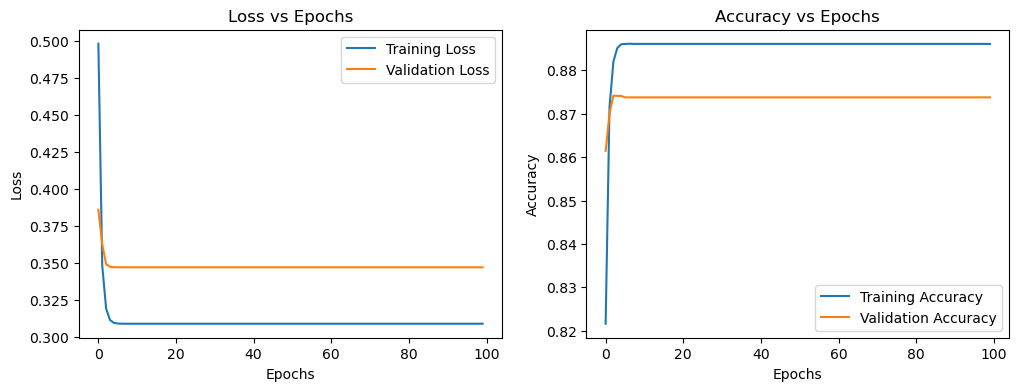

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(shallowModelHistory_adam.history['loss'], label='Training Loss')
plt.plot(shallowModelHistory_adam.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(shallowModelHistory_adam.history['accuracy'], label='Training Accuracy')
plt.plot(shallowModelHistory_adam.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


**Visualize the Report**

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.75      0.78      0.76      1000
           3       0.84      0.89      0.86      1000
           4       0.76      0.78      0.77      1000
           5       0.96      0.95      0.95      1000
           6       0.70      0.62      0.66      1000
           7       0.93      0.94      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



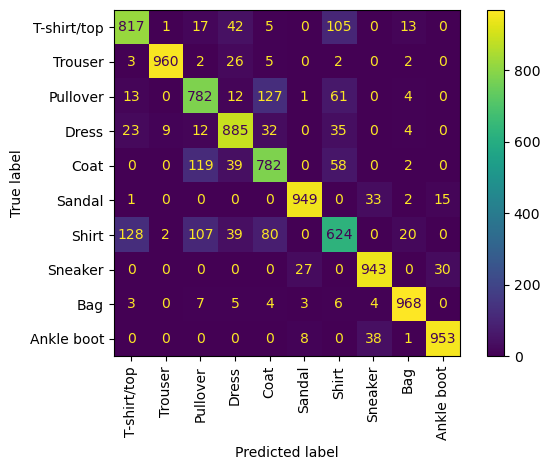

In [237]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

confusionMatrix = confusion_matrix(y_true=test_labels, y_pred=predicted_shallowModel_adam)

classificationReport = classification_report(y_true=test_labels, y_pred=predicted_shallowModel_adam)
print(f"Classification Report : \n {classificationReport}")

disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation=90)
plt.tight_layout()
plt.show()


### **Model 2:Construct a basic convolutional neural network (CNN)**

Creatig a Basic CNN network consists of Input, **1 Conv2D** layer **1 MaxPooling2D**  layer is used and output neurons is the number of output classes. Here, **1 Dense layer** is choosen with **128 nodes** and having **relu** as a activation function in the middle layers and **softmax** as an activation function for output layer having 10 neurons one for each label.

**Model with SGD optimizer**

In [180]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers

# Build the Sequential Model
basicCNNModel_sgd = Sequential([
    # Convolutional layers
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])  

initial_learning_rate = 0.01
optimizer = SGD(
    learning_rate=initial_learning_rate,
    momentum=0.9,
    nesterov=True
)

# Model Summary
basicCNNModel_sgd.summary()

# Compile the Model
basicCNNModel_sgd.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 9. Train the Model
basicCNNModelHistory_sgd = basicCNNModel_sgd.fit(
    train_images,
    train_labels_ohe,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    verbose=1
)

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_32 (Flatten)            │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7582 - loss: 0.6754 - val_accuracy: 0.8758 - val_loss: 0.3525
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8817 - loss: 0.3347 - val_accuracy: 0.8913 - val_loss: 0.3051
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8984 - loss: 0.2817 - val_accuracy: 0.8963 - val_loss: 0.2891
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9108 - loss: 0.2469 - val_accuracy: 0.9029 - val_loss: 0.2745
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9213 - loss: 0.2210 - val_accuracy: 0.9029 - val_loss: 0.2723
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9293 - loss: 0.1976 - val_accuracy: 0.9074 - val_loss: 0.2690
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9352 - loss: 0.1773 - val_accuracy: 0.9048 - val_loss: 0.2792
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9

**Saving the history of model**

In [181]:
import pandas as pd

basicCNNModelInfo = pd.DataFrame(basicCNNModelHistory_sgd.history)
basicCNNModelInfo

,accuracy,loss,val_accuracy,val_loss
0,0.825813,0.484491,0.875750,0.352535
1,0.885417,0.319681,0.891333,0.305113
2,0.900125,0.272158,0.896333,0.289061
3,0.912792,0.239135,0.902917,0.274480
4,0.922250,0.213883,0.902917,0.272296
...,...,...,...,...
95,1.000000,0.000066,0.914750,0.872037
96,1.000000,0.000065,0.914500,0.873120
97,1.000000,0.000063,0.914750,0.874164
98,1.000000,0.000062,0.914833,0.875183


**Evaluate the Model**

In [229]:
# Evaluate the Model
test_loss, test_accuracy = basicCNNModel_sgd.evaluate(test_images, test_labels_ohe, verbose=0)
print(f'\nTest loss: {test_loss:.3f}')
print(f'Test accuracy: {test_accuracy:.3f}')

# Make predictions on the test dataset
predictions_basicCNNModel_sgd = basicCNNModel_sgd.predict(test_images)
predicted_basicCNNModel_sgd = np.argmax(predictions_basicCNNModel_sgd, axis=1)


Test loss: 0.920
Test accuracy: 0.911
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Visualize the Accuracy and Loss**

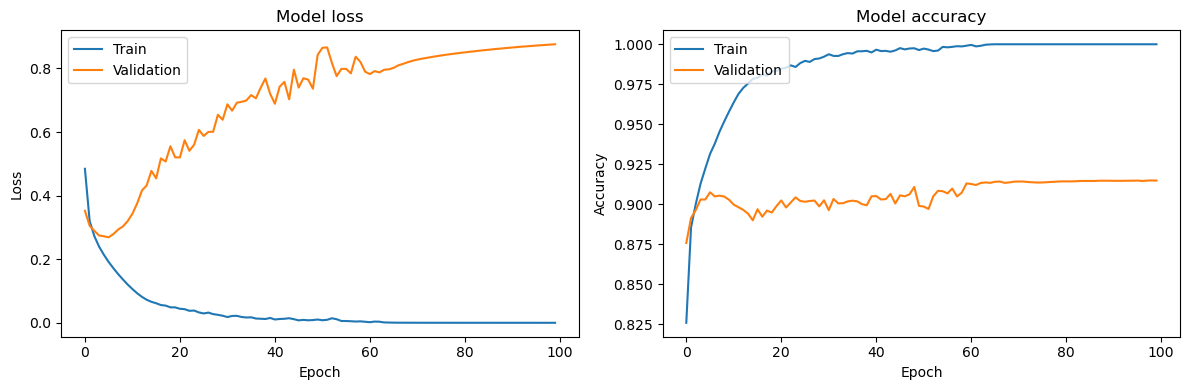

In [183]:
# Plot Training History
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(basicCNNModelHistory_sgd.history['loss'])
plt.plot(basicCNNModelHistory_sgd.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(basicCNNModelHistory_sgd.history['accuracy'])
plt.plot(basicCNNModelHistory_sgd.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()



**Visualize the Report**

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.88      0.86      1000
           3       0.92      0.91      0.91      1000
           4       0.86      0.87      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.75      0.76      1000
           7       0.95      0.96      0.96      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



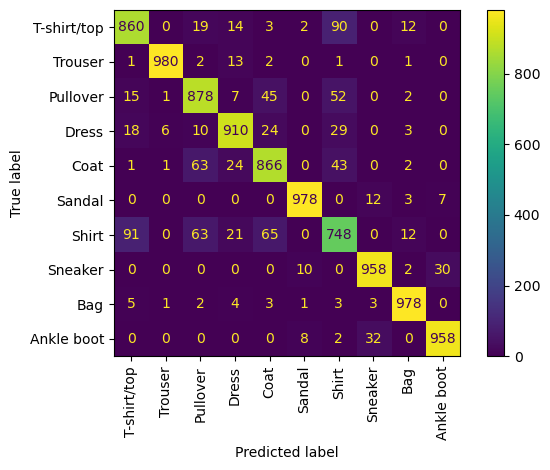

In [230]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

confusionMatrix = confusion_matrix(y_true=test_labels, y_pred=predicted_basicCNNModel_sgd)

classificationReport = classification_report(y_true=test_labels, y_pred=predicted_basicCNNModel_sgd)
print(f"Classification Report : \n {classificationReport}")

disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation=90)
plt.tight_layout()
plt.show()


**Model with Adam optimizer**

In [185]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Build the Sequential Model
basicCNNModel_adam = Sequential([
    # Convolutional layers
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Create learning_rate_schedule
learning_rate_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=100,
    decay_rate=0.9,
    staircase=True
)

# Create Optimizer
optimizer = Adam(
    learning_rate=learning_rate_schedule
)

# Model Summary
basicCNNModel_adam.summary()

# Compile the Model
basicCNNModel_adam.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 9. Train the Model
basicCNNModelHistory_adam = basicCNNModel_adam.fit(
    train_images,
    train_labels_ohe,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    verbose=1
)

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_33 (Flatten)            │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8233 - loss: 0.5148 - val_accuracy: 0.8937 - val_loss: 0.2891
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9137 - loss: 0.2351 - val_accuracy: 0.9068 - val_loss: 0.2552
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9317 - loss: 0.1880 - val_accuracy: 0.9087 - val_loss: 0.2523
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9357 - loss: 0.1755 - val_accuracy: 0.9098 - val_loss: 0.2516
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9369 - loss: 0.1726 - val_accuracy: 0.9101 - val_loss: 0.2516
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9368 - loss: 0.1719 - val_accuracy: 0.9100 - val_loss: 0.2516
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9366 - loss: 0.1717 - val_accuracy: 0.9102 - val_loss: 0.2517
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 

**Saving the history of Model**

In [186]:
import pandas as pd

basicCNNModelInfo = pd.DataFrame(basicCNNModelHistory_adam.history)
basicCNNModelInfo

,accuracy,loss,val_accuracy,val_loss
0,0.866437,0.372037,0.893667,0.289137
1,0.917854,0.221769,0.906833,0.255195
2,0.931250,0.186781,0.908750,0.252348
3,0.935125,0.177521,0.909833,0.251648
4,0.935979,0.175319,0.910083,0.251632
...,...,...,...,...
95,0.935896,0.174654,0.910167,0.251652
96,0.935896,0.174654,0.910167,0.251652
97,0.935896,0.174654,0.910167,0.251652
98,0.935896,0.174654,0.910167,0.251652


**Evaluate the Model**

In [238]:
# 10. Evaluate the Model
test_loss, test_accuracy = basicCNNModel_adam.evaluate(test_images, test_labels_ohe, verbose=1)
print(f'\nTest loss: {test_loss:.3f}')
print(f'Test accuracy: {test_accuracy:.3f}')

# Make predictions on the test dataset
predictions_basicCNNModel_adam = basicCNNModel_adam.predict(test_images)
predicted_basicCNNModel_adam = np.argmax(predictions_basicCNNModel_adam, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9044 - loss: 0.2702

Test loss: 0.262
Test accuracy: 0.906
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Visualize the Accuracy and Loss**

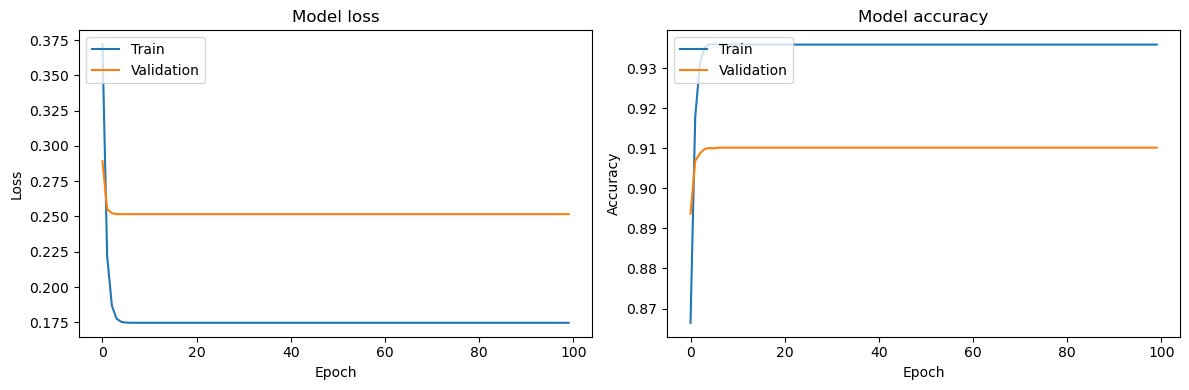

In [188]:
# 11. Plot Training History
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(basicCNNModelHistory_adam.history['loss'])
plt.plot(basicCNNModelHistory_adam.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(basicCNNModelHistory_adam.history['accuracy'])
plt.plot(basicCNNModelHistory_adam.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()



**Visualize the Report**

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.84      0.84      0.84      1000
           3       0.90      0.92      0.91      1000
           4       0.85      0.85      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.71      0.73      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



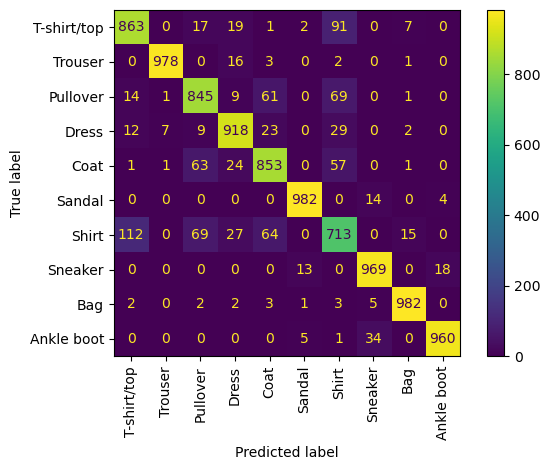

In [239]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

confusionMatrix = confusion_matrix(y_true=test_labels, y_pred=predicted_basicCNNModel_adam)

classificationReport = classification_report(y_true=test_labels, y_pred=predicted_basicCNNModel_adam)
print(f"Classification Report : \n {classificationReport}")

disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation=90)
plt.tight_layout()
plt.show()


### **Model 3: Build a deeper CNN, ensuring it’s architecturally different from Model 2.**

Creatig a Deep CNN network consists of **Input**, **3 Conv2D** layer **3 MaxPooling2D**.  And output neurons is the number of output classes. Here, **3 Dense layer** is choosen with **512 nodes**, **256 nodes** and **10 nodes** for output and having **relu** as a activation function in the middle layers and **softmax** as an activation function for output layer having 10 neurons one for each label.

**Model using SGD optimizer**

In [218]:
from tensorflow.keras import layers, models


# Build the convolutional  neural network model
deepCNNModel_sgd = models.Sequential([
    # Input
    layers.Input(shape=(28,28,1)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

initial_learning_rate = 0.01
optimizer = SGD(
    learning_rate=initial_learning_rate,
    momentum=0.9,
    nesterov=True
)


# Compile the model
deepCNNModel_sgd.compile(optimizer=optimizer,
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Model Summary
deepCNNModel_sgd.summary()

# Train the model with the training data
deepCNNModelHistory_sgd = deepCNNModel_sgd.fit(
            train_images, 
            train_labels_ohe, 
            epochs=100, 
            batch_size=32,
            validation_split=0.2
            )


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_40 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,618 (1.12 MB)

 Trainable params: 292,618 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6104 - loss: 1.0788 - val_accuracy: 0.8266 - val_loss: 0.4799
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8249 - loss: 0.4725 - val_accuracy: 0.8484 - val_loss: 0.4111
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8548 - loss: 0.3944 - val_accuracy: 0.8567 - val_loss: 0.3826
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.8711 - loss: 0.3478 - val_accuracy: 0.8702 - val_loss: 0.3516
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.8840 - loss: 0.3135 - val_accuracy: 0.8757 - val_loss: 0.3433
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.8925 - loss: 0.2897 - val_accuracy: 0.8739 - val_loss: 0.3527
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9011 - loss: 0.2704 - val_accuracy: 0.8805 - val_loss: 0.3404
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0

**Summary:** Model 2 contains 3 convolution layer, 2 maxpooling layer and 2 dense layer. The accurary it provided on the training dataset is around 96% and on test data is around 91%. This convolution model performs better over the shallow model which consists of only sequential 1D inputs and the dense layer. 

**Saving the History of Deep CNN Model**

In [219]:
import pandas as pd

deepCNNModelInfo = pd.DataFrame(deepCNNModelHistory_sgd.history)
deepCNNModelInfo

,accuracy,loss,val_accuracy,val_loss
0,0.732854,0.731321,0.826583,0.479890
1,0.834312,0.448482,0.848417,0.411124
2,0.859667,0.379910,0.856667,0.382621
3,0.875521,0.336619,0.870167,0.351589
4,0.886937,0.305134,0.875667,0.343264
...,...,...,...,...
95,0.986917,0.044023,0.873167,0.996820
96,0.990271,0.030518,0.878333,1.102714
97,0.987375,0.042460,0.868583,0.993900
98,0.985458,0.051634,0.879833,0.949704


**Evaluate the Model**

In [231]:
# Evaluate the model with the test data
test_loss, test_accuracy = deepCNNModel_sgd.evaluate(test_images, test_labels_ohe, verbose=2)

print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')


# Make predictions on the test dataset
predictions_deepCNNModel_sgd = deepCNNModel_sgd.predict(test_images)

# Convert probabilities to class indices
predicted_deepCNNModel_sgd = np.argmax(predictions_deepCNNModel_sgd, axis=1)

313/313 - 1s - 3ms/step - accuracy: 0.8698 - loss: 1.1084
Test loss: 1.1084078550338745
Test accuracy: 0.8697999715805054
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


**Visualize the Accuracy and Loss**

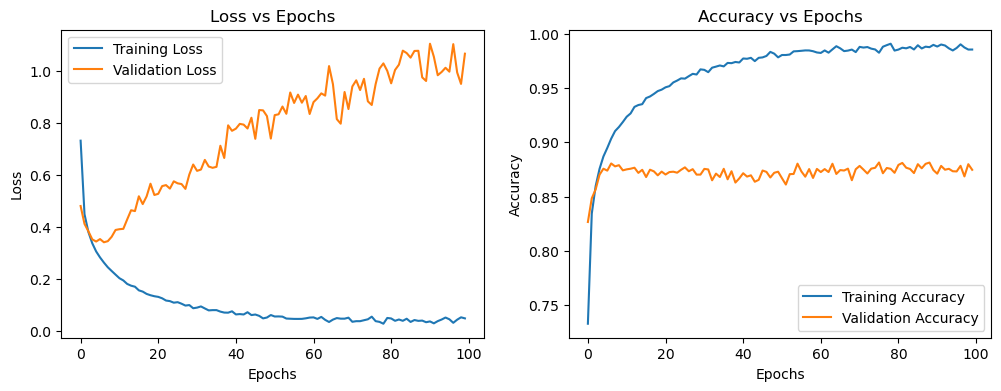

In [221]:
import matplotlib.pyplot as plt

# Assuming `history` is the object returned by model.fit()
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(deepCNNModelHistory_sgd.history['loss'], label='Training Loss')
plt.plot(deepCNNModelHistory_sgd.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(deepCNNModelHistory_sgd.history['accuracy'], label='Training Accuracy')
plt.plot(deepCNNModelHistory_sgd.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


**Visualize the Report**

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.74      0.83      0.78      1000
           3       0.86      0.88      0.87      1000
           4       0.82      0.72      0.77      1000
           5       0.95      0.97      0.96      1000
           6       0.66      0.69      0.67      1000
           7       0.94      0.92      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



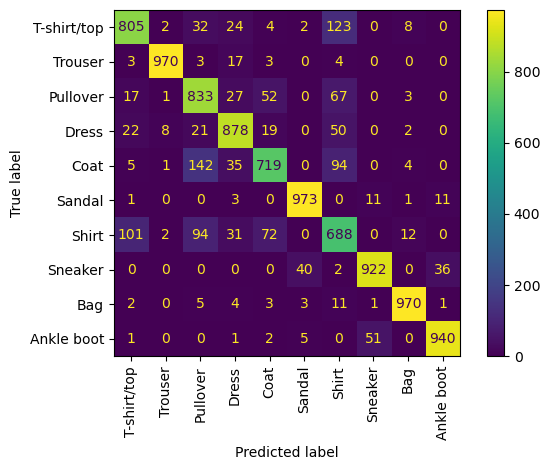

In [232]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

confusionMatrix = confusion_matrix(y_true=test_labels, y_pred=predicted_deepCNNModel_sgd)

classificationReport = classification_report(y_true=test_labels, y_pred=predicted_deepCNNModel_sgd)
print(f"Classification Report : \n {classificationReport}")

disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation=90)
plt.tight_layout()
plt.show()


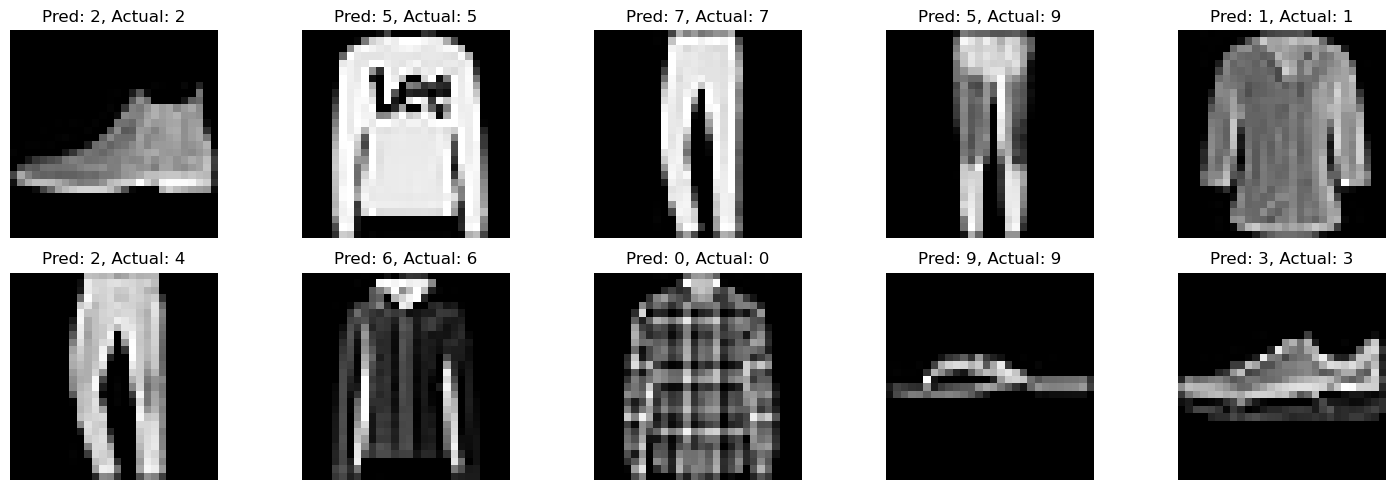

In [223]:
# Plot the first 10 test images with their predicted classes
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2 rows and 5 columns
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')  # Reshape if needed
    plt.title(f"Pred: {predicted_deepCNNModel_sgd[20+i]}, Actual: {test_labels[20+i]}")
    plt.axis('off')  # Turn off axis

plt.tight_layout()
plt.show()

**DeepCNN Model with Adam optimizer**

In [213]:
from tensorflow.keras import layers, models
# simple CNN model

# Build the convolutional  neural network model
deepCNNModel_adam = models.Sequential([
    # Input
    layers.Input(shape=(28,28,1)),

    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Dense layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Create learning_rate_schedule
learning_rate_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=100,
    decay_rate=0.9,
    staircase=True
)

# Create Optimizer
optimizer = Adam(
    learning_rate=learning_rate_schedule
)
# Compile the model
deepCNNModel_adam.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy, 
              metrics=['accuracy'])

# Model Summary
deepCNNModel_adam.summary()

# Train the model with the training data
deepCNNModelHistory_adam = deepCNNModel_adam.fit(
            train_images, 
            train_labels_ohe, 
            epochs=100, 
            batch_size=32,
            validation_split=0.2
        )


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_41 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_39 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,618 (1.12 MB)

 Trainable params: 292,618 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.6534 - loss: 0.8889 - val_accuracy: 0.8307 - val_loss: 0.4650
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8369 - loss: 0.4358 - val_accuracy: 0.8480 - val_loss: 0.4093
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8569 - loss: 0.3815 - val_accuracy: 0.8507 - val_loss: 0.3987
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8625 - loss: 0.3666 - val_accuracy: 0.8531 - val_loss: 0.3962
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8640 - loss: 0.3631 - val_accuracy: 0.8528 - val_loss: 0.3958
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8641 - loss: 0.3623 - val_accuracy: 0.8530 - val_loss: 0.3958
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8639 - loss: 0.3621 - val_accuracy: 0.8533 - val_loss: 0.3958
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0

**Save the history of Deep CNN**

In [214]:
import pandas as pd

deepCNNModelInfo = pd.DataFrame(deepCNNModelHistory_adam.history)
deepCNNModelInfo

,accuracy,loss,val_accuracy,val_loss
0,0.756146,0.642068,0.830750,0.464973
1,0.844354,0.415124,0.848000,0.409318
2,0.859062,0.374245,0.850667,0.398683
3,0.863500,0.363278,0.853083,0.396166
4,0.864167,0.360676,0.852750,0.395843
...,...,...,...,...
95,0.864229,0.359847,0.853250,0.395779
96,0.864229,0.359847,0.853250,0.395779
97,0.864229,0.359847,0.853250,0.395779
98,0.864229,0.359847,0.853250,0.395779


**Evaluate the Model**

In [240]:
# Evaluate the model with the test data
test_loss, test_accuracy = deepCNNModel_adam.evaluate(test_images, test_labels_ohe, verbose=2)

print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')


# Make predictions on the test dataset
predictions_deepCNNModel_adam = deepCNNModel_adam.predict(test_images)

# Convert probabilities to class indices
predicted_deepCNNModel_adam = np.argmax(predictions_deepCNNModel_adam, axis=1)

313/313 - 1s - 3ms/step - accuracy: 0.8474 - loss: 0.4163
Test loss: 0.4163386821746826
Test accuracy: 0.8474000096321106
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


**Visualize the Accuracy and Loss**

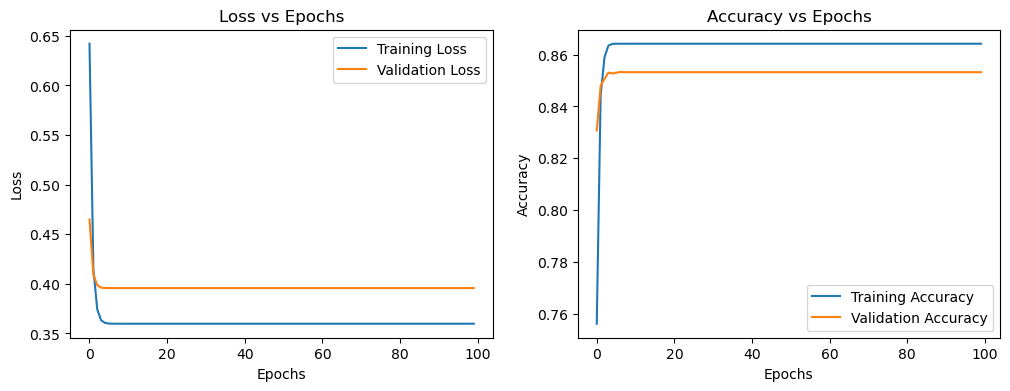

In [216]:
import matplotlib.pyplot as plt

# Assuming `history` is the object returned by model.fit()
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(deepCNNModelHistory_adam.history['loss'], label='Training Loss')
plt.plot(deepCNNModelHistory_adam.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(deepCNNModelHistory_adam.history['accuracy'], label='Training Accuracy')
plt.plot(deepCNNModelHistory_adam.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


**Visualize the report**

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.72      0.78      0.75      1000
           3       0.86      0.88      0.87      1000
           4       0.72      0.74      0.73      1000
           5       0.95      0.94      0.95      1000
           6       0.62      0.54      0.58      1000
           7       0.92      0.92      0.92      1000
           8       0.94      0.96      0.95      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



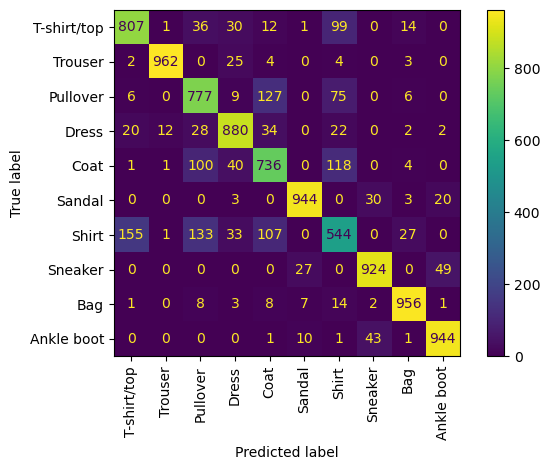

In [241]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

confusionMatrix = confusion_matrix(y_true=test_labels, y_pred=predicted_deepCNNModel_adam)

classificationReport = classification_report(y_true=test_labels, y_pred=predicted_deepCNNModel_adam)
print(f"Classification Report : \n {classificationReport}")

disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation=90)
plt.tight_layout()
plt.show()


**Construct a committee by averaging predictions of the three models**

**Prediction accuracy of the SGD Committee**

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Evaluating Individual Model Accuracy from Committee SGD

accuracy_shallow_sgd = accuracy_score(y_true=test_labels,y_pred=predicted_shallowModel_sgd )
accuracy_basic_cnn_sgd = accuracy_score(y_true=test_labels,y_pred=predicted_basicCNNModel_sgd)
accuracy_deep_cnn_sgd = accuracy_score(y_true=test_labels,y_pred=predicted_deepCNNModel_sgd)

print(f"Accuracy of Shallow Model (from SGD committee): {accuracy_shallow_sgd:.4f}")
print(f"Accuracy of Basic CNN Model (from SGD committee): {accuracy_basic_cnn_sgd:.4f}")
print(f"Accuracy of Deep CNN Model (from SGD committee): {accuracy_deep_cnn_sgd:.4f}")

# Average predictions from the committee SGD
committee_predictions_sgd = (predictions_shallowModel_sgd + predictions_basicCNNModel_sgd + predictions_deepCNNModel_sgd) / 3


# Final prediction from committee (argmax across averaged probabilities)
committee_pred_labels_sgd = np.argmax(committee_predictions_sgd, axis=1)

# Accuracy of committee
committee_accuracy = accuracy_score(test_labels, committee_pred_labels_sgd)
print(f"Combined SGD Committee Accuracy: {committee_accuracy:.4f}")


Accuracy of Shallow Model (from SGD committee): 0.8712
Accuracy of Basic CNN Model (from SGD committee): 0.9114
Accuracy of Deep CNN Model (from SGD committee): 0.8698
Combined SGD Committee Accuracy: 0.9125


**Prediction accuracy of the Adam Committee**

In [243]:
# Evaluating Individual Model Accuracy from Committee ADAM

accuracy_shallow_adam = accuracy_score(y_true=test_labels,y_pred=predicted_shallowModel_adam )
accuracy_basic_cnn_adam = accuracy_score(y_true=test_labels,y_pred=predicted_basicCNNModel_adam)
accuracy_deep_cnn_adam = accuracy_score(y_true=test_labels,y_pred=predicted_deepCNNModel_adam)

print(f"Accuracy of Shallow Model (from Adam committee): {accuracy_shallow_adam:.4f}")
print(f"Accuracy of Basic CNN Model (from Adam committee): {accuracy_basic_cnn_adam:.4f}")
print(f"Accuracy of Deep CNN Model (from Adam committee): {accuracy_deep_cnn_adam:.4f}")

# Average predictions from the earlier models
committee_predictions_adam = (predictions_shallowModel_adam + predictions_basicCNNModel_adam + predictions_deepCNNModel_adam) / 3

# Final prediction from committee (argmax across averaged probabilities)
committee_pred_labels_adam = np.argmax(committee_predictions_adam, axis=1)

# # True labels (convert one-hot to categorical)
# true_labels = np.argmax(test_labels_ohe, axis=1)

# Accuracy of committee
committee_accuracy_adam = accuracy_score(test_labels, committee_pred_labels_adam)
print(f"Combined Adam Committee Accuracy : {committee_accuracy_adam:.4f}")

Accuracy of Shallow Model (from Adam committee): 0.8663
Accuracy of Basic CNN Model (from Adam committee): 0.9063
Accuracy of Deep CNN Model (from Adam committee): 0.8474
Combined Adam Committee Accuracy : 0.8965


### **Extra Work**
Implement  techniques  to  enhance  model  performance:  data  augmentation,  dropout,  batch 
normalization,  etc.  Explore  ensemble  techniques  beyond  simple  averaging,  e.g.,  weighted 
averaging based on validation performance. 

Creatig a CNN network with Doupouts consists of **Input**, **1 Conv2D** layer **1 MaxPooling2D**.  And output neurons is the number of output classes. Here, **2 Dense layer** is choosen with **128 nodes** and **10 nodes** for output and having **relu** as a activation function in the middle layers and **softmax** as an activation function for output layer having 10 neurons one for each label. This model used **Batch Normalization** for stabilization and **Droupouts** for regularization to reduce overfitting. In this model **GaussianNoise** is also fed the model with noise data like real world data and **L2** to introduce regularization in the model. 

In [201]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import (
    EarlyStopping, 
    ReduceLROnPlateau
)

In [202]:
# Define Model Parameters
input_shape = (28, 28, 1)
num_classes = 10
batch_size = 32

# Create Learning Rate Schedule
initial_learning_rate = 0.01
decay_steps = 100
decay_rate = 0.9

# Create data generator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    validation_split=0.2
)

learning_rate_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=True
)

# Create Optimizer
optimizer = Adam(
    learning_rate=learning_rate_schedule,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
)

# Build the Sequential Model
extraModel = models.Sequential([
    # Input Layer
    layers.Input(shape=input_shape),
    
    # Add Gaussian noise for regularization
    layers.GaussianNoise(0.1),
    
    # Convolutional Layer with batch normalization
    layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        padding='same',
        kernel_initializer='he_normal'
    ),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    
    # MaxPooling layer
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    # Flatten layer
    layers.Flatten(),
    
    # Dense layers
    layers.Dense(
        128,
        kernel_initializer='he_normal',
        kernel_regularizer=tf.keras.regularizers.l2(0.01)
    ),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    
    # Output layer
    layers.Dense(num_classes, activation='softmax')
])

# 6. Model Summary
extraModel.summary()

# 7. Compile the Model
extraModel.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks for optimization
callbacks = [
    # Early stopping to prevent overfitting
    EarlyStopping(
        monitor='val_loss',
        patience=5, 
        restore_best_weights=True,
        verbose=1
    ),
    
    # Reduce learning rate when training plateaus
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1
    ),
]

# Training parameters
batch_size = 32
epochs = 100

# Fit the model with data augmentation
train_generator = datagen.flow(
    train_images.reshape(-1, 28,28, 1), 
    train_labels_ohe,
    batch_size=batch_size,
    subset='training'
)

validation_generator = datagen.flow(
    train_images.reshape(-1, 28,28, 1),
    train_labels_ohe,
    batch_size=batch_size,
    subset='validation'
)

# Train the model
extraModelHistory = extraModel.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=callbacks
)



Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gaussian_noise_11               │ (None, 28, 28, 1)      │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_36 (Flatten)            │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,608,458 (6.14 MB)

 Trainable params: 1,608,074 (6.13 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/100


c:\Users\aarun\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.5692 - loss: 4.3057 - val_accuracy: 0.7120 - val_loss: 1.4495 - learning_rate: 0.0021
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 39ms/step - accuracy: 0.6832 - loss: 1.3842 - val_accuracy: 0.7742 - val_loss: 0.8608 - learning_rate: 4.2391e-04
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 60s 40ms/step - accuracy: 0.7297 - loss: 0.9516 - val_accuracy: 0.7856 - val_loss: 0.7041 - learning_rate: 8.7280e-05
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 61s 41ms/step - accuracy: 0.7528 - loss: 0.7978 - val_accuracy: 0.7872 - val_loss: 0.6698 - learning_rate: 1.7970e-05
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 60s 40ms/step - accuracy: 0.7592 - loss: 0.7602 - val_accuracy: 0.7878 - val_loss: 0.6561 - learning_rate: 3.6999e-06
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 60s 40ms/step - accuracy: 0.7628 - loss: 0.7534 - val_accuracy: 0.7902 - val_loss: 0.6527 - learning_rate: 7.6177e-07
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 60s 40m

**Save the history of model**

In [203]:
import pandas as pd

extraModelInfo = pd.DataFrame(extraModelHistory.history)
extraModelInfo

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.616542,2.796404,0.712000,1.449471,2.058910e-03
1,0.693729,1.246142,0.774167,0.860835,4.239112e-04
2,0.738083,0.897172,0.785583,0.704089,8.727953e-05
3,0.754458,0.787658,0.787250,0.669816,1.797007e-05
4,0.759938,0.755087,0.787750,0.656080,3.699877e-06
5,0.760750,0.752399,0.790167,0.652671,7.617717e-07
6,0.761250,0.750113,0.785583,0.654932,1.568420e-07
7,0.757729,0.756930,0.787250,0.653306,3.229236e-08
8,0.757312,0.758339,0.787917,0.653861,6.648707e-09
9,0.758479,0.754144,0.788917,0.654146,1.368909e-09


**Evaluate the Model**

In [204]:
# 10. Evaluate the Model
test_loss, test_accuracy = extraModel.evaluate(test_images, test_labels_ohe, verbose=0)
print(f'\nTest loss: {test_loss:.3f}')
print(f'\nTest accuracy: {test_accuracy:.3f}')

# Make predictions on the test dataset
predictions = extraModel.predict(test_images)

# Convert probabilities to class indices
predicted_classes = np.argmax(predictions, axis=1)


Test loss: 0.588

Test accuracy: 0.811
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


**Visualize the Accuracy and Loss**

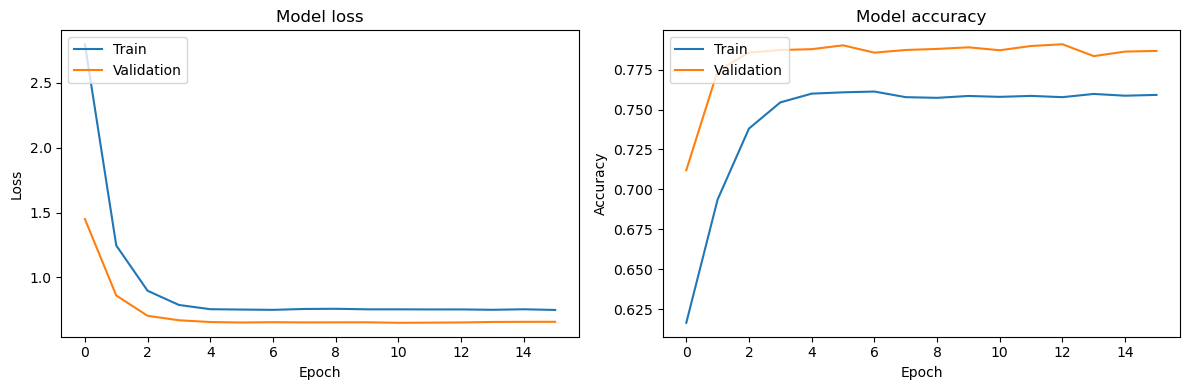

In [205]:

# Plot Training History
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(extraModelHistory.history['loss'])
plt.plot(extraModelHistory.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(extraModelHistory.history['accuracy'])
plt.plot(extraModelHistory.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()



**Visualize the Report**

Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.83      0.78      1000
           1       0.96      0.96      0.96      1000
           2       0.59      0.77      0.67      1000
           3       0.80      0.85      0.82      1000
           4       0.69      0.68      0.69      1000
           5       0.97      0.92      0.95      1000
           6       0.51      0.25      0.33      1000
           7       0.88      0.95      0.91      1000
           8       0.95      0.96      0.96      1000
           9       0.95      0.94      0.94      1000

    accuracy                           0.81     10000
   macro avg       0.80      0.81      0.80     10000
weighted avg       0.80      0.81      0.80     10000



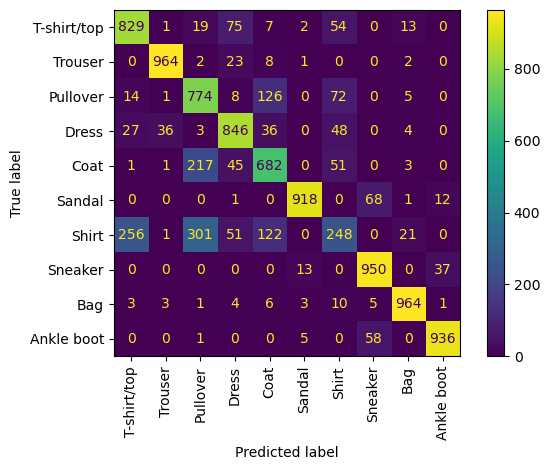

In [206]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

confusionMatrix = confusion_matrix(y_true=test_labels, y_pred=predicted_classes)

classificationReport = classification_report(y_true=test_labels, y_pred=predicted_classes)
print(f"Classification Report : \n {classificationReport}")

disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation=90)
plt.tight_layout()
plt.show()


### **Q2. Please use the Fashion MNIST dataset in Q1 to implement the following network along with batch normalization and dropout layers. (30 Points)**


This model is Neural Network with ship connection, resembles with ResNet (residual network). This model consists of **2 Dense** layer having **784** neurons with Batch Normalization, activation and droupout performed at each Dense block. Input is **Concatinated** directly to the output of dense 2 layer for feature preservation.

In [ ]:
from tensorflow.keras import models, layers
from tensorflow import keras


input_layer = layers.Input(shape=(28,28,1))
input_flatten = layers.Flatten()(input_layer)

# First dense block
hidden1 = layers.Dense(784)(input_flatten)
hidden1_bn = layers.BatchNormalization()(hidden1)
hidden1_act = layers.Activation('relu')(hidden1_bn)
hidden1_droupout = layers.Dropout(0.3)(hidden1_act)

# Second dense block
hidden2 = layers.Dense(784)(hidden1_droupout)
hidden2_bn = layers.BatchNormalization()(hidden2)
hidden2_act = layers.Activation('relu')(hidden1_bn)
hidden2_droupout = layers.Dropout(0.3)(hidden1_act)

# Reshape hidden2 output for concatenation
hidden2_reshaped = layers.Reshape((28, 28, 1))(hidden2_droupout)

concat = layers.Concatenate(axis=-1)([input_layer, hidden2_reshaped])
concat_flatten = layers.Flatten()(concat)

output = layers.Dense(10, activation='softmax')(concat_flatten)

residualModel = models.Model(inputs=[input_layer], outputs=[output])

# Create learning_rate_schedule
learning_rate_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=100,
    decay_rate=0.9,
    staircase=True
)

# Create Optimizer
optimizer = Adam(
    learning_rate=learning_rate_schedule
)

# Create and compile the model
residualModel.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


# Model summary
residualModel.summary()

# Train the model
residualModelHistory = residualModel.fit(
    train_images,
    train_labels_ohe,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_39      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_37          │ (None, 784)       │          0 │ input_layer_39[0… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_80 (Dense)    │ (None, 784)       │    615,440 │ flatten_37[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 784)       │      3,136 │ dense_80[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_26       │ (None, 784)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_27          │ (None, 784)       │          0 │ activation_26[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 28, 28, 1) │          0 │ dropout_27[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 28, 28, 2) │          0 │ input_layer_39[0… │
│ (Concatenate)       │                   │            │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_38          │ (None, 1568)      │          0 │ concatenate_1[0]… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_82 (Dense)    │ (None, 10)        │     15,690 │ flatten_38[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 634,266 (2.42 MB)

 Trainable params: 632,698 (2.41 MB)

 Non-trainable params: 1,568 (6.12 KB)

Epoch 1/50


c:\Users\aarun\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_345']. Received: the structure of inputs=*
  warnings.warn(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7715 - loss: 0.7926 - val_accuracy: 0.8507 - val_loss: 0.4180
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8708 - loss: 0.3618 - val_accuracy: 0.8773 - val_loss: 0.3427
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8903 - loss: 0.3036 - val_accuracy: 0.8806 - val_loss: 0.3285
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8951 - loss: 0.2871 - val_accuracy: 0.8803 - val_loss: 0.3255
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8986 - loss: 0.2826 - val_accuracy: 0.8813 - val_loss: 0.3250
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8978 - loss: 0.2808 - val_accuracy: 0.8812 - val_loss: 0.3249
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8972 - loss: 0.2816 - val_accuracy: 0.8810 - val_loss: 0.3249
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8973 - loss: 0.2816 - val_a

**Save the history of Residual Model**

In [212]:
import pandas as pd

residualModelInfo = pd.DataFrame(residualModelHistory.history)
residualModelInfo

,accuracy,loss,val_accuracy,val_loss
0,0.815521,0.578985,0.850667,0.418048
1,0.875271,0.348176,0.877333,0.342734
2,0.890833,0.303525,0.880583,0.328482
3,0.894750,0.290640,0.880333,0.325515
4,0.896667,0.287861,0.881333,0.324982
5,0.896417,0.286461,0.881167,0.324878
6,0.896000,0.285765,0.881000,0.324863
7,0.897167,0.285738,0.881000,0.324860
8,0.896792,0.287118,0.881000,0.324859
9,0.896604,0.286297,0.881000,0.324859


**Evaluate the Model**

In [209]:
# 10. Evaluate the Model
test_loss, test_accuracy = residualModel.evaluate(test_images, test_labels_ohe, verbose=0)
print(f'\nTest loss: {test_loss:.3f}')
print(f'\nTest accuracy: {test_accuracy:.3f}')



# Make predictions on the test dataset
predictions = residualModel.predict(test_images)

# Convert probabilities to class indices
predicted_classes = np.argmax(predictions, axis=1)

c:\Users\aarun\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_345']. Received: the structure of inputs=*
  warnings.warn(



Test loss: 0.351

Test accuracy: 0.876
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**Visualize the Accuracy and Loss**

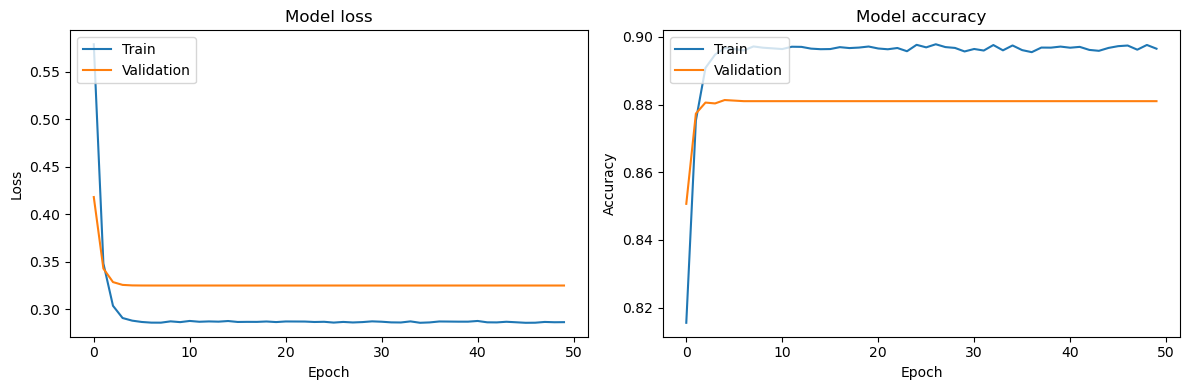

In [244]:

# 11. Plot Training History
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(residualModelHistory.history['loss'])
plt.plot(residualModelHistory.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(residualModelHistory.history['accuracy'])
plt.plot(residualModelHistory.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()



**Visualize the Report**

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.72      0.78      0.75      1000
           3       0.86      0.88      0.87      1000
           4       0.72      0.74      0.73      1000
           5       0.95      0.94      0.95      1000
           6       0.62      0.54      0.58      1000
           7       0.92      0.92      0.92      1000
           8       0.94      0.96      0.95      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



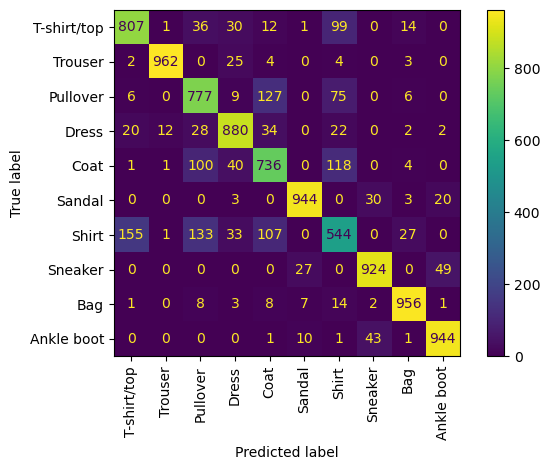

In [245]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

confusionMatrix = confusion_matrix(y_true=test_labels, y_pred=predicted_classes)

classificationReport = classification_report(y_true=test_labels, y_pred=predicted_classes)
print(f"Classification Report : \n {classificationReport}")

disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=class_names)
disp.plot(cmap='viridis', xticks_rotation=90)
plt.tight_layout()
plt.show()
